In [28]:
import os, sys
sys.path.append(os.path.abspath(".."))

In [29]:
import pandas as pd
from pathlib import Path

RAW = Path("../data_raw") / "statcast_full.parquet"
df = pd.read_parquet(RAW)
df.shape, df.head()


((120112, 24),
     game_date  game_pk  pitcher  batter pitch_type  release_speed  \
 0  2023-04-07   718693   660593  663743         SL           79.2   
 1  2023-04-07   718693   660593  663743         FF           93.4   
 2  2023-04-07   718693   660593  660821         FF           93.4   
 3  2023-04-07   718693   660593  660821         FC           87.9   
 4  2023-04-07   718693   660593  660821         CH           85.3   
 
    release_pos_x  release_pos_z  pfx_x  pfx_z  ...  strikes inning  \
 0          -2.18           5.61   1.17   0.29  ...        1      9   
 1          -2.09           5.78  -0.74   1.52  ...        0      9   
 2          -2.08           5.79  -0.65   1.52  ...        2      9   
 3          -2.29           5.72   0.19    1.2  ...        1      9   
 4          -2.51            5.6  -1.62   0.49  ...        1      9   
 
   outs_when_up   on_1b  on_2b  on_3b      description  \
 0            1  516416   <NA>   <NA>    hit_into_play   
 1            1  51

![alt text](../images/image.png)

In [30]:
print(df.columns)

Index(['game_date', 'game_pk', 'pitcher', 'batter', 'pitch_type',
       'release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
       'spin_rate_deprecated', 'p_throws', 'stand', 'balls', 'strikes',
       'inning', 'outs_when_up', 'on_1b', 'on_2b', 'on_3b', 'description',
       'events', 'hc_x', 'hc_y'],
      dtype='object')


In [31]:
from src.data.quality_checks import null_report, basic_ranges, value_counts_top
null_report(df).head(20)

,null_frac
spin_rate_deprecated,1.000000
on_3b,0.901642
hc_x,0.829109
hc_y,0.829109
on_2b,0.806697
events,0.745279
on_1b,0.687034
release_pos_z,0.000175
pfx_z,0.000175
release_speed,0.000175


In [32]:
df["runner_on_1b"] = df["on_1b"].notna().astype(int)
df["runner_on_2b"] = df["on_2b"].notna().astype(int)
df["runner_on_3b"] = df["on_3b"].notna().astype(int)


In [33]:
basic_ranges(df)

,count,mean,std,min,1%,5%,50%,95%,99%,max
release_speed,120091.0,88.638314,6.07145,38.5,73.5,78.3,89.4,96.8,99.0,103.5
pfx_x,120091.0,-0.101418,0.915477,-2.58,-1.66,-1.46,-0.13,1.39,1.64,2.22
pfx_z,120091.0,0.61217,0.726336,-1.98,-1.33,-0.77,0.66,1.59,1.741,2.5
spin_rate_deprecated,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
inning,120112.0,4.915262,2.582053,1.0,1.0,1.0,5.0,9.0,9.0,12.0
balls,120112.0,0.887214,0.967863,0.0,0.0,0.0,1.0,3.0,3.0,4.0
strikes,120112.0,0.89802,0.827646,0.0,0.0,0.0,1.0,2.0,2.0,2.0


In [34]:
dup_count = df.duplicated(subset=["game_date","pitcher","batter","inning","balls","strikes"]).sum()
print(f"Duplicate rows: {dup_count}")

Duplicate rows: 8122


In [35]:
subset = ["game_date","pitcher","batter","inning","balls","strikes"]
dupes = df[df.duplicated(subset=subset, keep=False)]
print(f"{dupes.shape[0]} rows in duplicate groups ({dupes[subset].drop_duplicates().shape[0]} unique groups)")
dupes.head(10)


14294 rows in duplicate groups (6172 unique groups)


,game_date,game_pk,pitcher,batter,pitch_type,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,...,on_1b,on_2b,on_3b,description,events,hc_x,hc_y,runner_on_1b,runner_on_2b,runner_on_3b
38,2023-04-07,718693,548384,665862,FF,90.3,2.32,5.83,0.36,0.84,...,<NA>,<NA>,<NA>,hit_into_play,single,122.36,136.92,0,0,0
39,2023-04-07,718693,548384,665862,ST,81.8,2.89,5.46,-1.52,0.47,...,<NA>,<NA>,<NA>,foul,None,<NA>,<NA>,0,0,0
45,2023-04-07,718693,642701,643265,SI,94.0,-2.31,5.56,-1.92,1.31,...,624585,650333,<NA>,hit_into_play,home_run,153.58,37.15,1,1,0
46,2023-04-07,718693,642701,643265,SI,94.2,-2.34,5.56,-1.75,0.96,...,624585,650333,<NA>,foul,None,<NA>,<NA>,1,1,0
48,2023-04-07,718693,642701,643265,FF,94.8,-2.2,5.6,-1.1,1.48,...,624585,650333,<NA>,ball,None,<NA>,<NA>,1,1,0
49,2023-04-07,718693,642701,643265,SI,94.8,-2.31,5.55,-1.82,0.79,...,624585,650333,<NA>,foul,None,<NA>,<NA>,1,1,0
60,2023-04-07,718693,642701,650333,CH,87.3,-2.35,5.66,-1.78,1.01,...,<NA>,<NA>,<NA>,ball,None,<NA>,<NA>,0,0,0
61,2023-04-07,718693,642701,650333,SL,82.5,-2.15,5.65,0.37,0.29,...,<NA>,<NA>,<NA>,foul,None,<NA>,<NA>,0,0,0
62,2023-04-07,718693,642701,650333,FF,94.9,-2.05,5.64,-1.39,1.43,...,<NA>,<NA>,<NA>,foul,None,<NA>,<NA>,0,0,0
63,2023-04-07,718693,642701,650333,SL,82.8,-2.3,5.56,0.1,0.18,...,<NA>,<NA>,<NA>,ball,None,<NA>,<NA>,0,0,0


In [36]:
value_counts_top(df, "pitch_type", n=20)
value_counts_top(df, "events", n=30)
value_counts_top(df, "description", n=30)

description
ball                       40682
foul                       20902
hit_into_play              20533
called_strike              20292
swinging_strike            12645
blocked_ball                2619
foul_tip                    1198
swinging_strike_blocked      660
hit_by_pitch                 366
foul_bunt                    174
missed_bunt                   32
pitchout                       6
bunt_foul_tip                  3
Name: count, dtype: int64

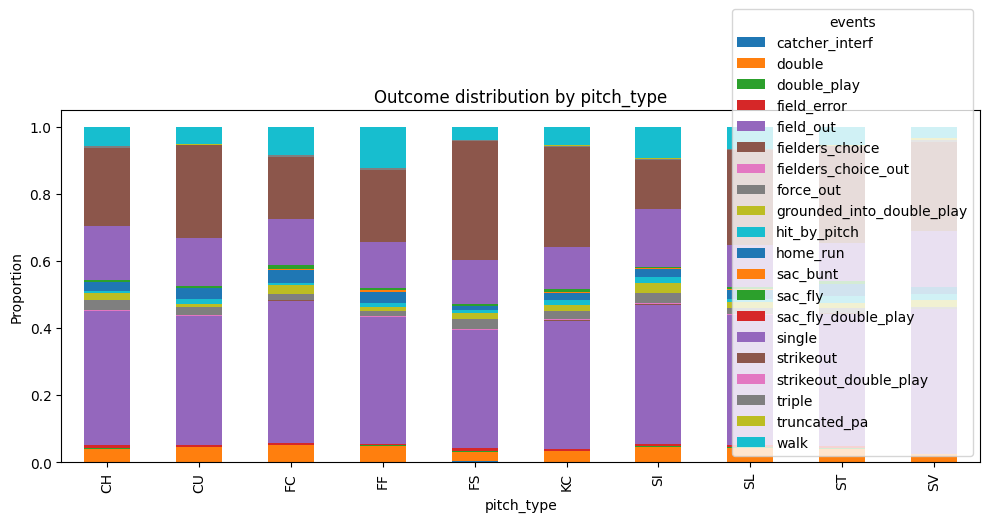

In [37]:
import importlib, src.visualization.plots as plots
importlib.reload(plots)
plots.pitch_type_outcome_bar(df, outcome_col="events", top_n=10)


In [38]:
# Handedness splits quick peek
for col in ["p_throws","stand"]:
    display(df[col].value_counts(dropna=False))

p_throws
R    86297
L    33815
Name: count, dtype: int64

stand
R    70848
L    49264
Name: count, dtype: int64

# 🔧 EDA Quality Gate & Cleaning (auto-inserted 2025-10-24 22:16 UTC)

This section was programmatically added to enhance the EDA and finish the ingestion
**quality gate**. It adds:
- schema presence checks (with graceful fallbacks for plate location),
- duplicate diagnostics & deduplication,
- dtype normalization,
- sanity histograms and counts,
- location hexbin (if plate location present) plus movement/release plots,
- persistence to partitioned Parquet, and
- an auto-generated `docs/data_dictionary.md` template.


In [39]:
# --- Setup
import os, json, math, warnings
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

# If the EDA variable `df` doesn't exist yet, try to load a cached parquet near the project root.
if 'df' not in globals():
    guess = Path.cwd()
    candidates = list(guess.glob('**/statcast_full.parquet')) + list(guess.glob('**/pitches.parquet'))
    if candidates:
        print(f'Loaded df from {candidates[0]}')
        df = pd.read_parquet(candidates[0])
    else:
        print('Note: df not defined and no fallback parquet found. Please load your dataframe before running this section.')


In [40]:
# --- Robust plate column detection
def _plate_cols(df: pd.DataFrame, x_hint: str | None = None, y_hint: str | None = None):
    # Manual override
    if x_hint and y_hint:
        if {x_hint, y_hint}.issubset(df.columns):
            return x_hint, y_hint
        raise KeyError(f"Provided x/y hints not found in df: {x_hint}, {y_hint}")
    # Known pairs (ordered by preference)
    candidates = [
        ("plate_x","plate_z"),
        ("px","pz"),
        ("PlateX","PlateZ"),
        ("pitch_plate_x","pitch_plate_z"),
        ("x","z"),
        ("loc_x","loc_z"),
    ]
    for xcol, ycol in candidates:
        if {xcol, ycol}.issubset(df.columns):
            return xcol, ycol
    # Heuristic search for any plate_*_x/_z
    lowers = {c.lower(): c for c in df.columns}
    plate_x = next((lowers[c] for c in lowers if 'plate' in c and c.endswith('_x')), None)
    plate_z = next((lowers[c] for c in lowers if 'plate' in c and c.endswith('_z')), None)
    if plate_x and plate_z:
        return plate_x, plate_z
    return None, None  # explicit: not present


In [41]:
# --- Schema presence checks
KEEP = [
    "game_date","pitcher","batter",
    "p_throws","stand","pitch_type",
    "release_speed","release_pos_x","release_pos_z",
    "pfx_x","pfx_z",
    "spin_rate_deprecated","spin_rate",
    "px","pz","plate_x","plate_z",
    "balls","strikes","inning","outs_when_up",
    "on_1b","on_2b","on_3b",
    "description","events",
    "hc_x","hc_y"
]
present = [c for c in KEEP if c in df.columns]
missing = [c for c in KEEP if c not in df.columns]
print('Present:', present)
print('Missing:', missing)

xcol, ycol = _plate_cols(df)
print('Detected plate columns:', (xcol, ycol))


Present: ['game_date', 'pitcher', 'batter', 'p_throws', 'stand', 'pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'spin_rate_deprecated', 'balls', 'strikes', 'inning', 'outs_when_up', 'on_1b', 'on_2b', 'on_3b', 'description', 'events', 'hc_x', 'hc_y']
Missing: ['spin_rate', 'px', 'pz', 'plate_x', 'plate_z']
Detected plate columns: (None, None)


In [42]:
# --- Duplicate diagnostics
subset_minimal = ["game_date","pitcher","batter","inning","balls","strikes"]
dupes = df[df.duplicated(subset=subset_minimal, keep=False)]
print(f"Duplicate rows under minimal key: {dupes.shape[0]} "
      f"({dupes[subset_minimal].drop_duplicates().shape[0]} duplicate groups)")

# Try stronger keys if available
pitch_cols = [c for c in df.columns if any(k in c.lower() for k in ["pitch_number","pitch_id"])]
abat_cols = [c for c in df.columns if "at_bat" in c.lower()]
if pitch_cols:
    key = subset_minimal + pitch_cols[:1]
    print("Using stronger key with:", pitch_cols[:1])
else:
    key = subset_minimal

# Drop exact duplicates first
before = len(df)
df = df.drop_duplicates()
print(f"Exact duplicates removed: {before - len(df)}")

# If still duplicates under minimal key, keep the 'most complete' row per group
dupes_after = df[df.duplicated(subset=key, keep=False)]
if not dupes_after.empty:
    print(f"Resolving {len(dupes_after)} rows across duplicate groups using null-count heuristic...")
    tmp = df.copy()
    tmp['_na'] = tmp.isna().sum(axis=1)
    df = (tmp.sort_values('_na')
             .drop_duplicates(subset=key, keep='first')
             .drop(columns=['_na']))
    print('Remaining duplicates under key:', df.duplicated(subset=key).sum())
else:
    print('No duplicate groups remain under key.')


Duplicate rows under minimal key: 14294 (6172 duplicate groups)
Exact duplicates removed: 0
Resolving 14294 rows across duplicate groups using null-count heuristic...
Remaining duplicates under key: 0


In [43]:
# --- Dtype normalization
if "game_date" in df.columns:
    df["game_date"] = pd.to_datetime(df["game_date"]).dt.date

cat_cols = [c for c in ["pitch_type","events","description","p_throws","stand"] if c in df.columns]
for c in cat_cols:
    df[c] = df[c].astype("category")

num_cols_clip = [c for c in ["release_speed","pfx_x","pfx_z","px","pz","plate_x","plate_z"] if c in df.columns]
for c in num_cols_clip:
    # conservative clipping to reasonable baseball ranges
    if c in ["release_speed"]:
        df[c] = df[c].clip(lower=35, upper=105)
    elif c in ["px","plate_x"]:
        df[c] = df[c].clip(-3, 3)
    elif c in ["pz","plate_z"]:
        df[c] = df[c].clip(0, 6)


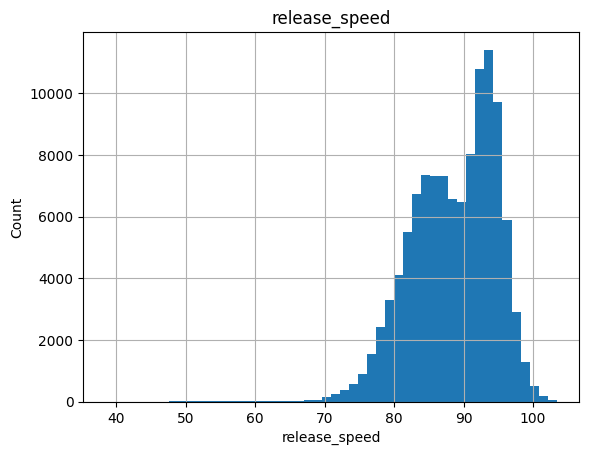

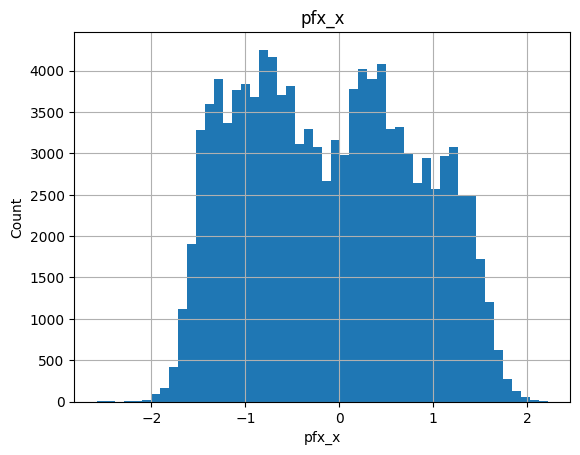

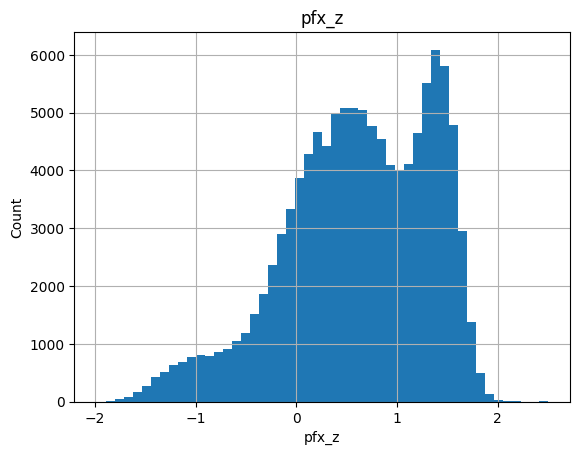

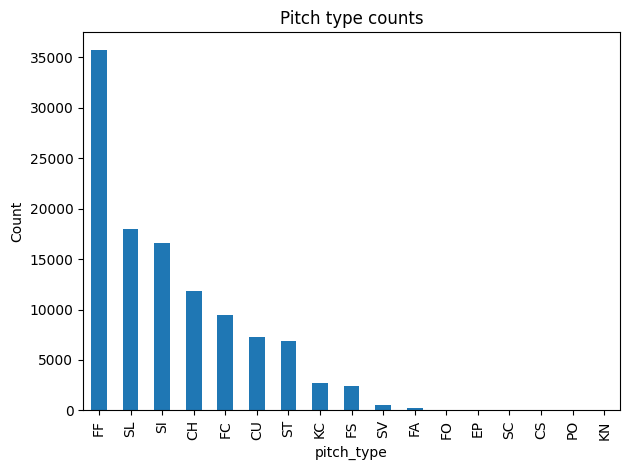

No plate location columns found; showing movement and release plots instead.


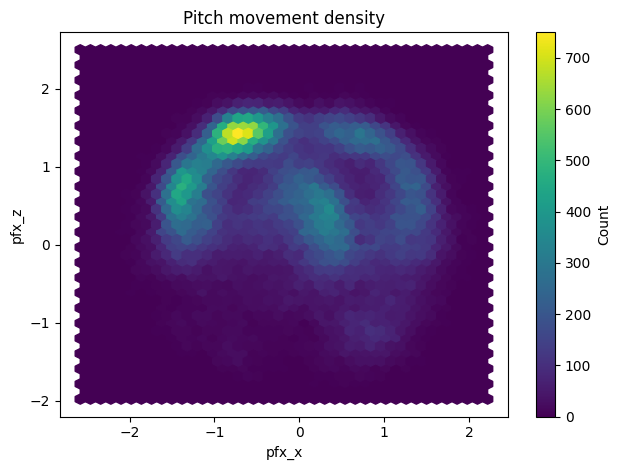

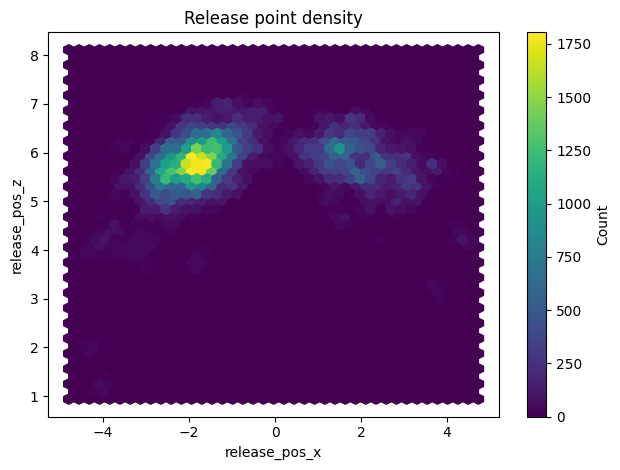

In [44]:
# --- Quality Gate visuals
conts = [c for c in ["release_speed","px","pz","plate_x","plate_z","pfx_x","pfx_z"] if c in df.columns]
for col in conts:
    ax = df[col].dropna().hist(bins=50)
    ax.set_title(col)
    ax.set_xlabel(col); ax.set_ylabel("Count")
    plt.show()

if "pitch_type" in df.columns:
    ax = df["pitch_type"].value_counts().sort_values(ascending=False).plot(kind="bar", title="Pitch type counts")
    ax.set_ylabel("Count")
    plt.tight_layout(); plt.show()

# Plate location hexbin (fallback to (px,pz) or (plate_x,plate_z))
if xcol and ycol:
    plt.hexbin(df[xcol], df[ycol], gridsize=40)
    plt.xlabel(xcol); plt.ylabel(ycol); plt.title("All pitch locations (plate)")
    cb = plt.colorbar(); cb.set_label("Count")
    plt.tight_layout(); plt.show()
else:
    print("No plate location columns found; showing movement and release plots instead.")
    if {"pfx_x","pfx_z"}.issubset(df.columns):
        plt.hexbin(df["pfx_x"], df["pfx_z"], gridsize=40)
        plt.xlabel("pfx_x"); plt.ylabel("pfx_z"); plt.title("Pitch movement density")
        plt.colorbar(label="Count"); plt.tight_layout(); plt.show()
    if {"release_pos_x","release_pos_z"}.issubset(df.columns):
        plt.hexbin(df["release_pos_x"], df["release_pos_z"], gridsize=40)
        plt.xlabel("release_pos_x"); plt.ylabel("release_pos_z"); plt.title("Release point density")
        plt.colorbar(label="Count"); plt.tight_layout(); plt.show()


In [47]:
# --- Persist cleaned data to partitioned Parquet per season (FIXED)
from pathlib import Path
import pandas as pd

out_root = Path("data_raw")
out_root.mkdir(parents=True, exist_ok=True)

if "game_date" in df.columns:
    # Compute season once and keep it for grouping (avoids index misalignment)
    season = pd.to_datetime(df["game_date"], errors="coerce").dt.year
    df = df.assign(season=season)
    seasons = sorted([int(y) for y in df["season"].dropna().unique()])
    print("Writing partitions for seasons:", seasons)

    # Convert categories to string before saving (parquet robustness)
    cat_cols = df.select_dtypes(include="category").columns.tolist()

    for y, part in df.dropna(subset=["season"]).groupby("season", sort=True):
        part = part.drop(columns=["season"]).copy()
        for c in cat_cols:
            if c in part.columns:
                part[c] = part[c].astype("string")
        tgt = out_root / f"season={int(y)}"
        tgt.mkdir(parents=True, exist_ok=True)
        part.to_parquet(tgt / "pitches.parquet", index=False)
else:
    (out_root / "season=unknown").mkdir(parents=True, exist_ok=True)
    df.to_parquet(out_root / "season=unknown" / "pitches.parquet", index=False)

print(f"Saved cleaned parquet(s) under: {out_root.resolve()}")


Writing partitions for seasons: [2023]
Saved cleaned parquet(s) under: /Users/anna/Desktop/Baseball_project/notebooks/data_raw


In [46]:
# --- Auto-generate a docs/data_dictionary.md skeleton
docs_dir = Path.cwd() / "docs"
docs_dir.mkdir(parents=True, exist_ok=True)
dd_path = docs_dir / "data_dictionary.md"

# Minimal descriptions; user can refine later
descriptions = {
    "px": "Horizontal plate location (ft). -3 Left, +3 Right.",
    "pz": "Vertical plate location (ft) at the front of home plate.",
    "plate_x": "Horizontal plate location (ft). Same meaning as px (newer name).",
    "plate_z": "Vertical plate location (ft). Same as pz (newer name).",
    "pfx_x": "Horizontal break of pitch at 40ft (ft).",
    "pfx_z": "Vertical break of pitch at 40ft (ft).",
    "release_speed": "Pitch velocity (mph).",
    "release_pos_x": "Release point horizontal (ft).",
    "release_pos_z": "Release point height (ft).",
    "spin_rate": "Estimated spin rate (rpm).",
    "spin_rate_deprecated": "Legacy spin rate column; prefer spin_rate if present.",
    "events": "Play outcome for the pitch/plate appearance.",
    "description": "Text description of the pitch event.",
    "p_throws": "Pitcher throwing hand (R/L).",
    "stand": "Batter stance (R/L).",
    "inning": "Inning number.",
    "balls": "Balls in count before pitch.",
    "strikes": "Strikes in count before pitch.",
    "outs_when_up": "Number of outs when batter came up.",
    "on_1b": "Runner on 1st (id) or NaN.",
    "on_2b": "Runner on 2nd (id) or NaN.",
    "on_3b": "Runner on 3rd (id) or NaN.",
    "hc_x": "Hit coordinate x on field diagram.",
    "hc_y": "Hit coordinate y on field diagram.",
}

with open(dd_path, "w", encoding="utf-8") as f:
    f.write("# Data Dictionary\n\n")
    f.write("| Column | Type | Non-null % | Description |\n|---|---|---:|---|\n")
    for c in df.columns:
        desc = descriptions.get(c, "")
        nn = 100 * (1 - df[c].isna().mean())
        f.write(f"| {c} | {df[c].dtype} | {nn:.1f}% | {desc} |\n")

print(f"Wrote data dictionary template to: {dd_path.resolve()}")


Wrote data dictionary template to: /Users/anna/Desktop/Baseball_project/notebooks/docs/data_dictionary.md
